<a href="https://colab.research.google.com/github/AureliaWambui19/Kira-plastina/blob/main/HYREACHY_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading the Libraries we need for the analysis

In [ ]:
# Installing packages that we have not.

library(devtools)
install_github("vqv/ggbiplot", force = TRUE)
install.packages("DataExplorer") 
install.packages("Hmisc")
install.packages("pastecs")
install.packages("psych")
install.packages("corrplot")
install.packages("factoextra")
install.packages("Rtsne")
install.packages("caret")



✔  checking for file ‘/tmp/RtmpsqDxcv/remotes3d45dea4a0/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Loading Libraries necessary

library(tidyverse)
library(magrittr)
library(warn = -1)

library(ggbiplot)
library(RColorBrewer)
library(ggplot2)
library(lattice)
library(corrplot)

library(DataExplorer)
library(Hmisc)
library(pastecs)
library(psych)
library(factoextra)
library(Rtsne)
library(caret)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from 

# 1.2 Loading Data

In [ ]:
# Loading the Dataset 

df = read_csv('http://bit.ly/EcommerceCustomersDataset')


── Column specification ────────────────────────────────────────────────────────
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)




# 1.3 checking data

In [ ]:
# Checking the top observations

head(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [ ]:
# Checking the bottom observations

tail(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [ ]:
# Checking the data a subset and summary data

glimpse(df)

Rows: 12,330
Columns: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser                 <

* The dataset has 18 columns and 12,330 rows.


In [ ]:
# Checking the summary statistics of the dataset in all the columns

summary(df)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

# 1.4 Data Cleaning

## 1,4.1 Missing Values

In [ ]:
# Checking for Missing Values

# Checking for Missing Values per column

colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     12                      12                      12 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     12                      12                      12 
            BounceRates               ExitRates              PageValues 
                     12                      12                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

* There are missing values in some columns.
* We will fill them appropriately.

In [ ]:
# Checking for missing for the whole dataset
sum(is.na(df))

[1] 96

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘visdat’, ‘UpSetR’




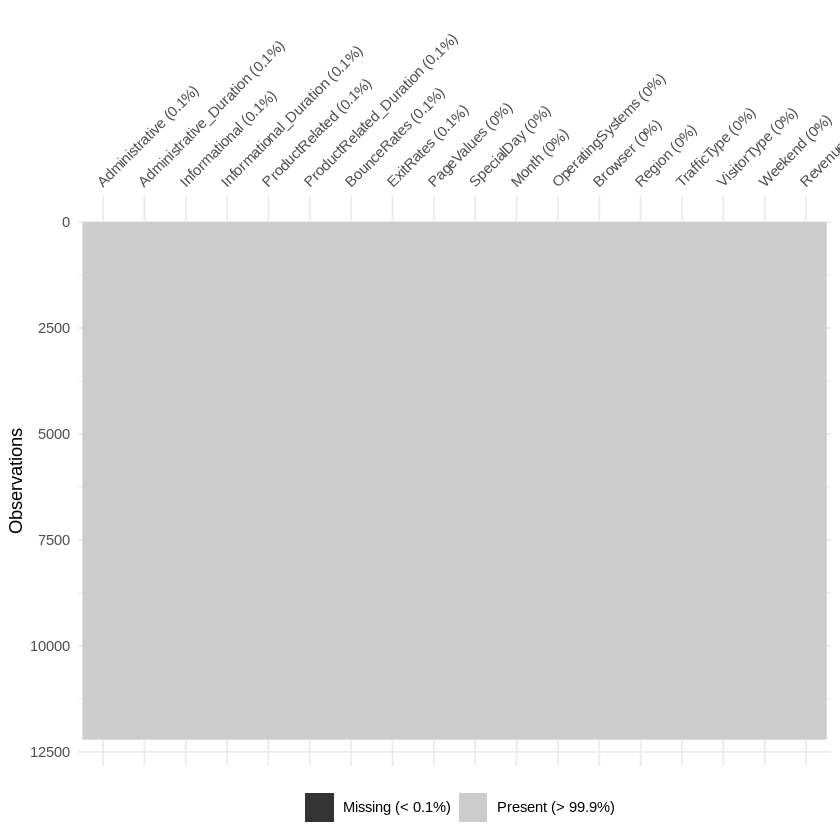

In [ ]:
# visualizing missing data


  install.packages("naniar")
library(naniar)

vis_miss(df)
   

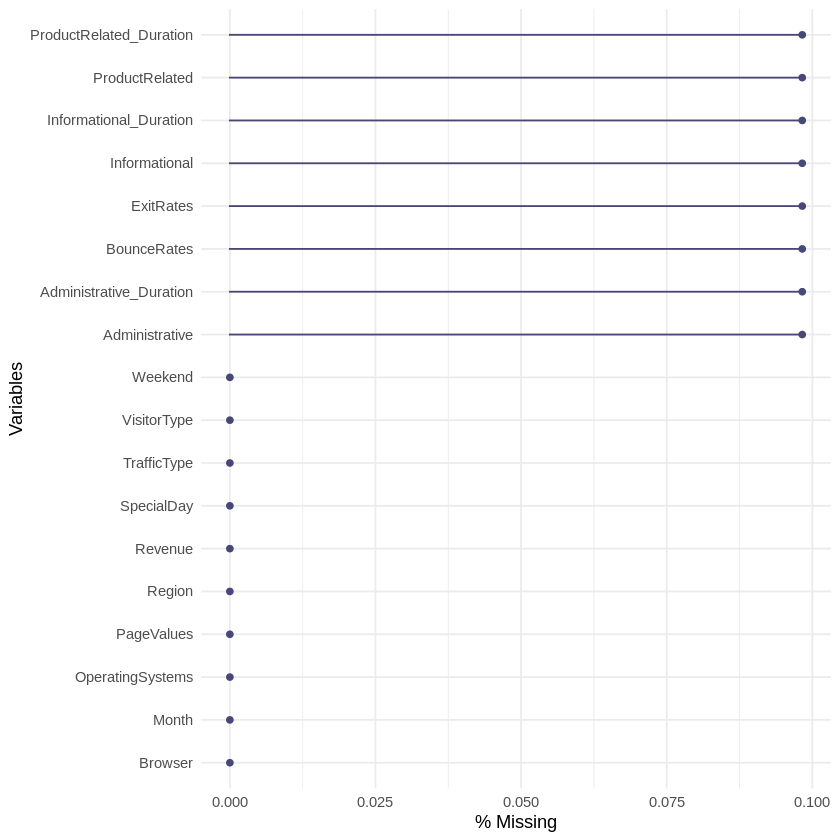

In [ ]:
# visualizing missing data in another format


gg_miss_var(df, show_pct = TRUE)

In [ ]:
# Dropping missing values dfclean= na.omit(df)
dfclean<-na.omit(df)

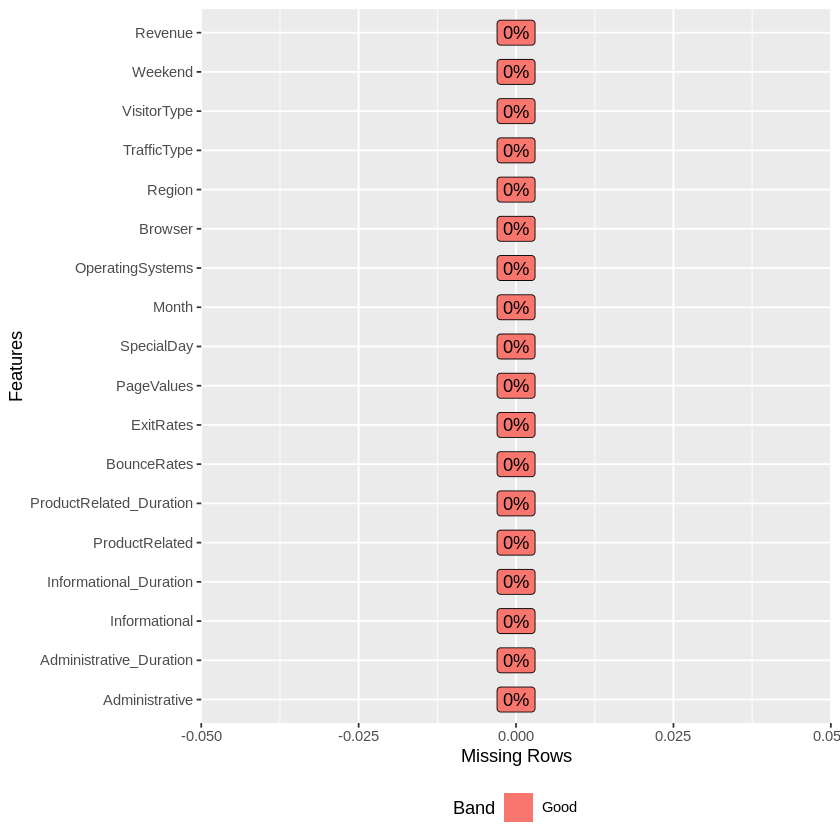

In [ ]:
# checking if we have any remaining missing values
plot_missing(dfclean)

* The output is 0: we have no null values

## 1.4.2 Duplicates 

In [ ]:
# Checking for Duplicates

df3 <- df[duplicated(df),]
dim(df3)

[1] 119  18

* There are 119 dupicated rows.
* We will remove them.

In [20]:
# Removing duplicates

dfclean <- df[!duplicated(df),]
dim(dfclean)

[1] 12211    18

# 1.5 Encoding data,normalizitation

In [ ]:
dfnew<- dfclean[-c(18)]
dfnew

In [ ]:
dummy = dummyVars(" ~ .", data = dfnew)

dfcleanfinal = data.frame(predict(dummy, newdata = dfnew))
dfcleanfinal

In [24]:
# We will, therefore, remove Class Attribute “Revenue” and store it in another variable. 

dfcleanfinal_copy <- dfcleanfinal
dfcleanclass.class<- dfclean[, "Revenue"]

dfcleanfinal_copy1 <- dfcleanfinal

In [26]:

dfnormalized <- as.data.frame(apply(dfcleanfinal_copy1, 2, function(x) (x - min(x))/(max(x)-min(x))))

# 1.6 Hierachical clustering

In [27]:
# We now use the R function hclust() for hierarchical clustering
d <- dist(dfnormalized, method = "euclidean")
d

                 1            2            3            4            5
2     2.039559e-01                                                    
3     1.284484e+00 1.227639e+00                                       
4     4.222870e-01 2.550715e-01 1.048279e+00                          
5     1.716806e+00 1.677790e+00 2.052614e+00 1.671249e+00             
6     2.303781e-01 6.184944e-02 1.226080e+00 2.314853e-01 1.674366e+00
7     6.611018e-01 5.911405e-01 1.093974e+00 5.593725e-01 1.763736e+00
8     1.683063e+00 1.680630e+00 2.102711e+00 1.702950e+00 3.551705e-01
9     9.790102e-01 9.535262e-01 1.436462e+00 9.569836e-01 1.925848e+00
                 6            7            8            9           10
2                                                                     
3                                                                     
4                                                                     
5                                                                     
6     


Call:
hclust(d = d, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 12211 


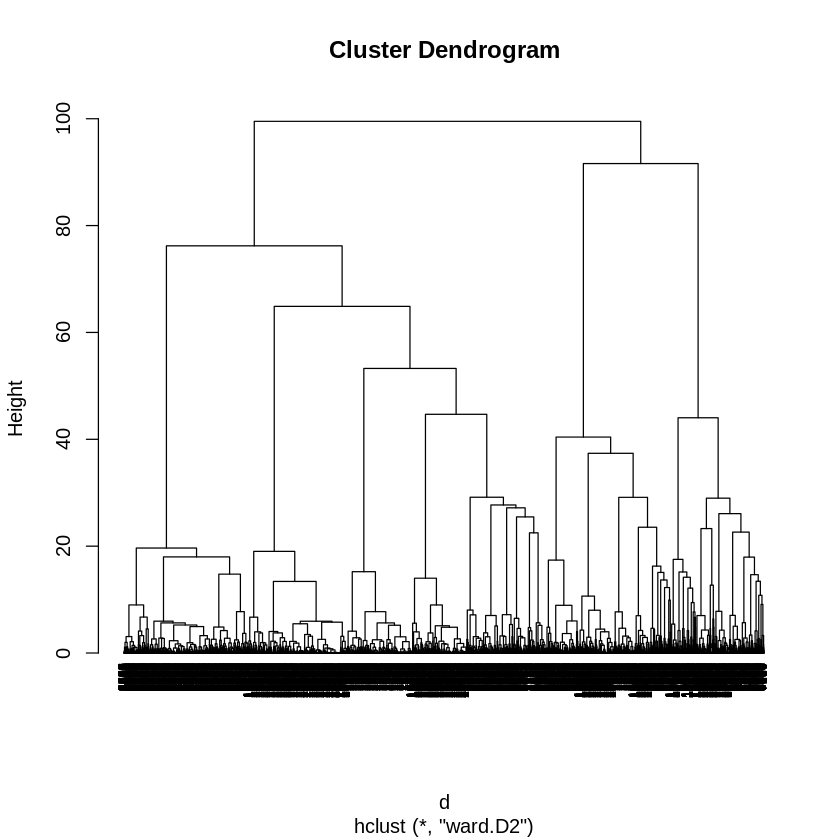

In [31]:
# We then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )
res.hc

# Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.6, hang = -1)

In [39]:
# Cut the tree

# Cut tree into 6 groups
sixgroups <- cutree(res.hc, k = 6)
head(sixgroups, n = 6)



1 2 3 4 5 6 
1 1 1 1 2 1

In [40]:
# Number of members in each cluster
table(sixgroups)

sixgroups
   1    2    3    4    5    6 
2558 2373 1774 1245 2381 1880 